In [1]:
import pandas as pd

# Load datasets
diet_df = pd.read_csv('/Users/pavelpavlov/Desktop/gaussian_peppers/food_diets_eda/raw_data/share-healthy-diet-unaffordable/share-healthy-diet-unaffordable.csv')
inflation_df = pd.read_csv('/Users/pavelpavlov/Desktop/gaussian_peppers/food_diets_eda/cleaned_data/inflation_of_consumer_prices_cleaned.csv')


In [2]:
print(inflation_df.columns)


Index(['Entity', 'Code', 'Year', 'Inflation, consumer prices (annual %)'], dtype='object')


In [6]:
print(diet_df.columns)

Index(['Entity', 'Code', 'Year',
       'Share of the population who cannot afford a healthy diet'],
      dtype='object')


In [3]:
# Country name harmonization
mapping = {
    'Democratic Republic of Congo': 'Democratic Republic of the Congo',
    'Ivory Coast': "Cote d'Ivoire",
    'Venezuela': 'Venezuela, Bolivarian Republic of',
    'Iran': 'Iran, Islamic Republic of',
    'Syria': 'Syrian Arab Republic'
}
diet_df['Entity'] = diet_df['Entity'].replace(mapping)
inflation_df['Entity'] = inflation_df['Entity'].replace(mapping)



In [7]:
merged_df = pd.merge(
    inflation_df,
    diet_df,
    on=['Entity', 'Code', 'Year'],
    how='inner'
)


In [8]:
corr_per_country = (
    merged_df.groupby('Entity')[['Inflation, consumer prices (annual %)', 'Share of the population who cannot afford a healthy diet']]
    .corr().iloc[0::2, -1]  # takes correlation values from each pair
    .reset_index()
    .drop('level_1', axis=1)
    .rename(columns={'Share of the population who cannot afford a healthy diet': 'Correlation'})
    .sort_values('Correlation', ascending=False)
)


/var/folders/yh/g7vq8gw96lb2ghdgftx2fymh0000gn/T/ipykernel_14900/2833682403.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


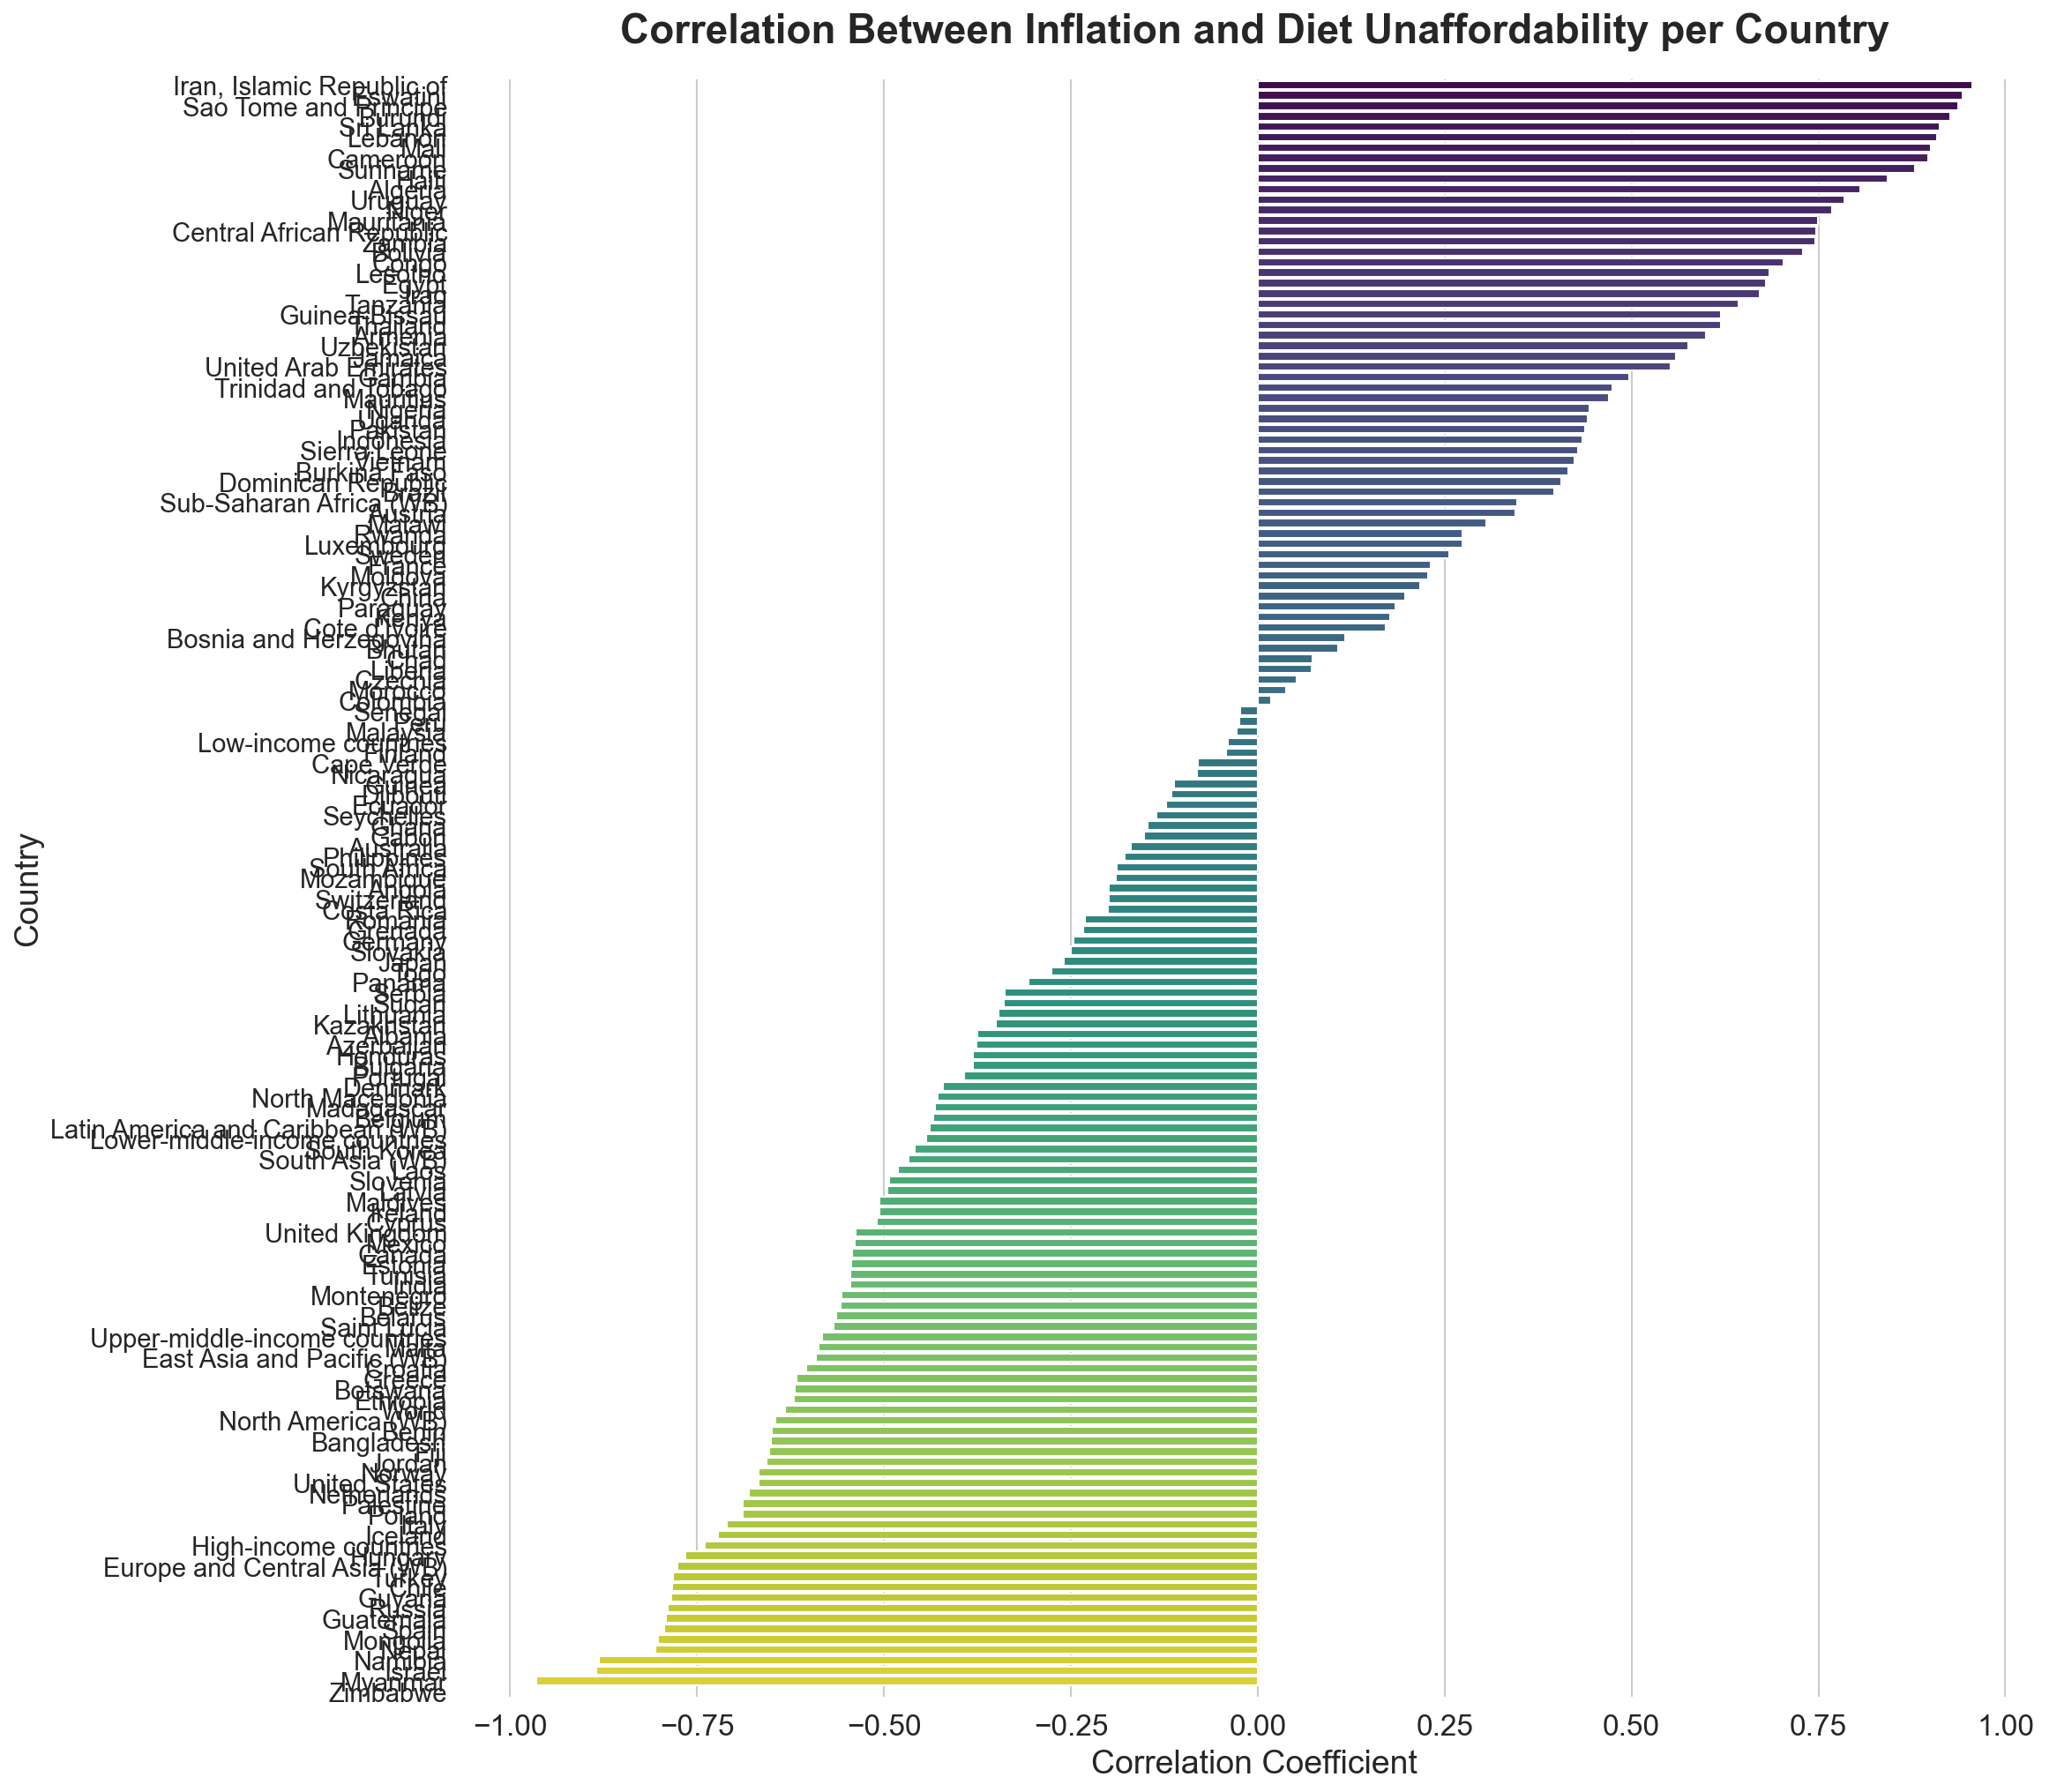

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global theme and make fonts larger
sns.set_theme(style='whitegrid', font_scale=1.8)

# Create figure with larger size and higher resolution (wider and taller)
plt.figure(figsize=(16, 14), dpi=150)

# Draw the barplot
sns.barplot(
    data=corr_per_country,
    y='Entity',
    x='Correlation',
    palette='viridis'
)

# Improve layout with bigger fonts and spacing
plt.title('Correlation Between Inflation and Diet Unaffordability per Country', fontsize=22, weight='bold', pad=20)
plt.xlabel('Correlation Coefficient', fontsize=18)
plt.ylabel('Country', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)

# Optionally rotate y-tick labels if long names overlap (comment if not needed)
# plt.yticks(rotation=25)

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()


/var/folders/yh/g7vq8gw96lb2ghdgftx2fymh0000gn/T/ipykernel_14900/1936796570.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/var/folders/yh/g7vq8gw96lb2ghdgftx2fymh0000gn/T/ipykernel_14900/1936796570.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')


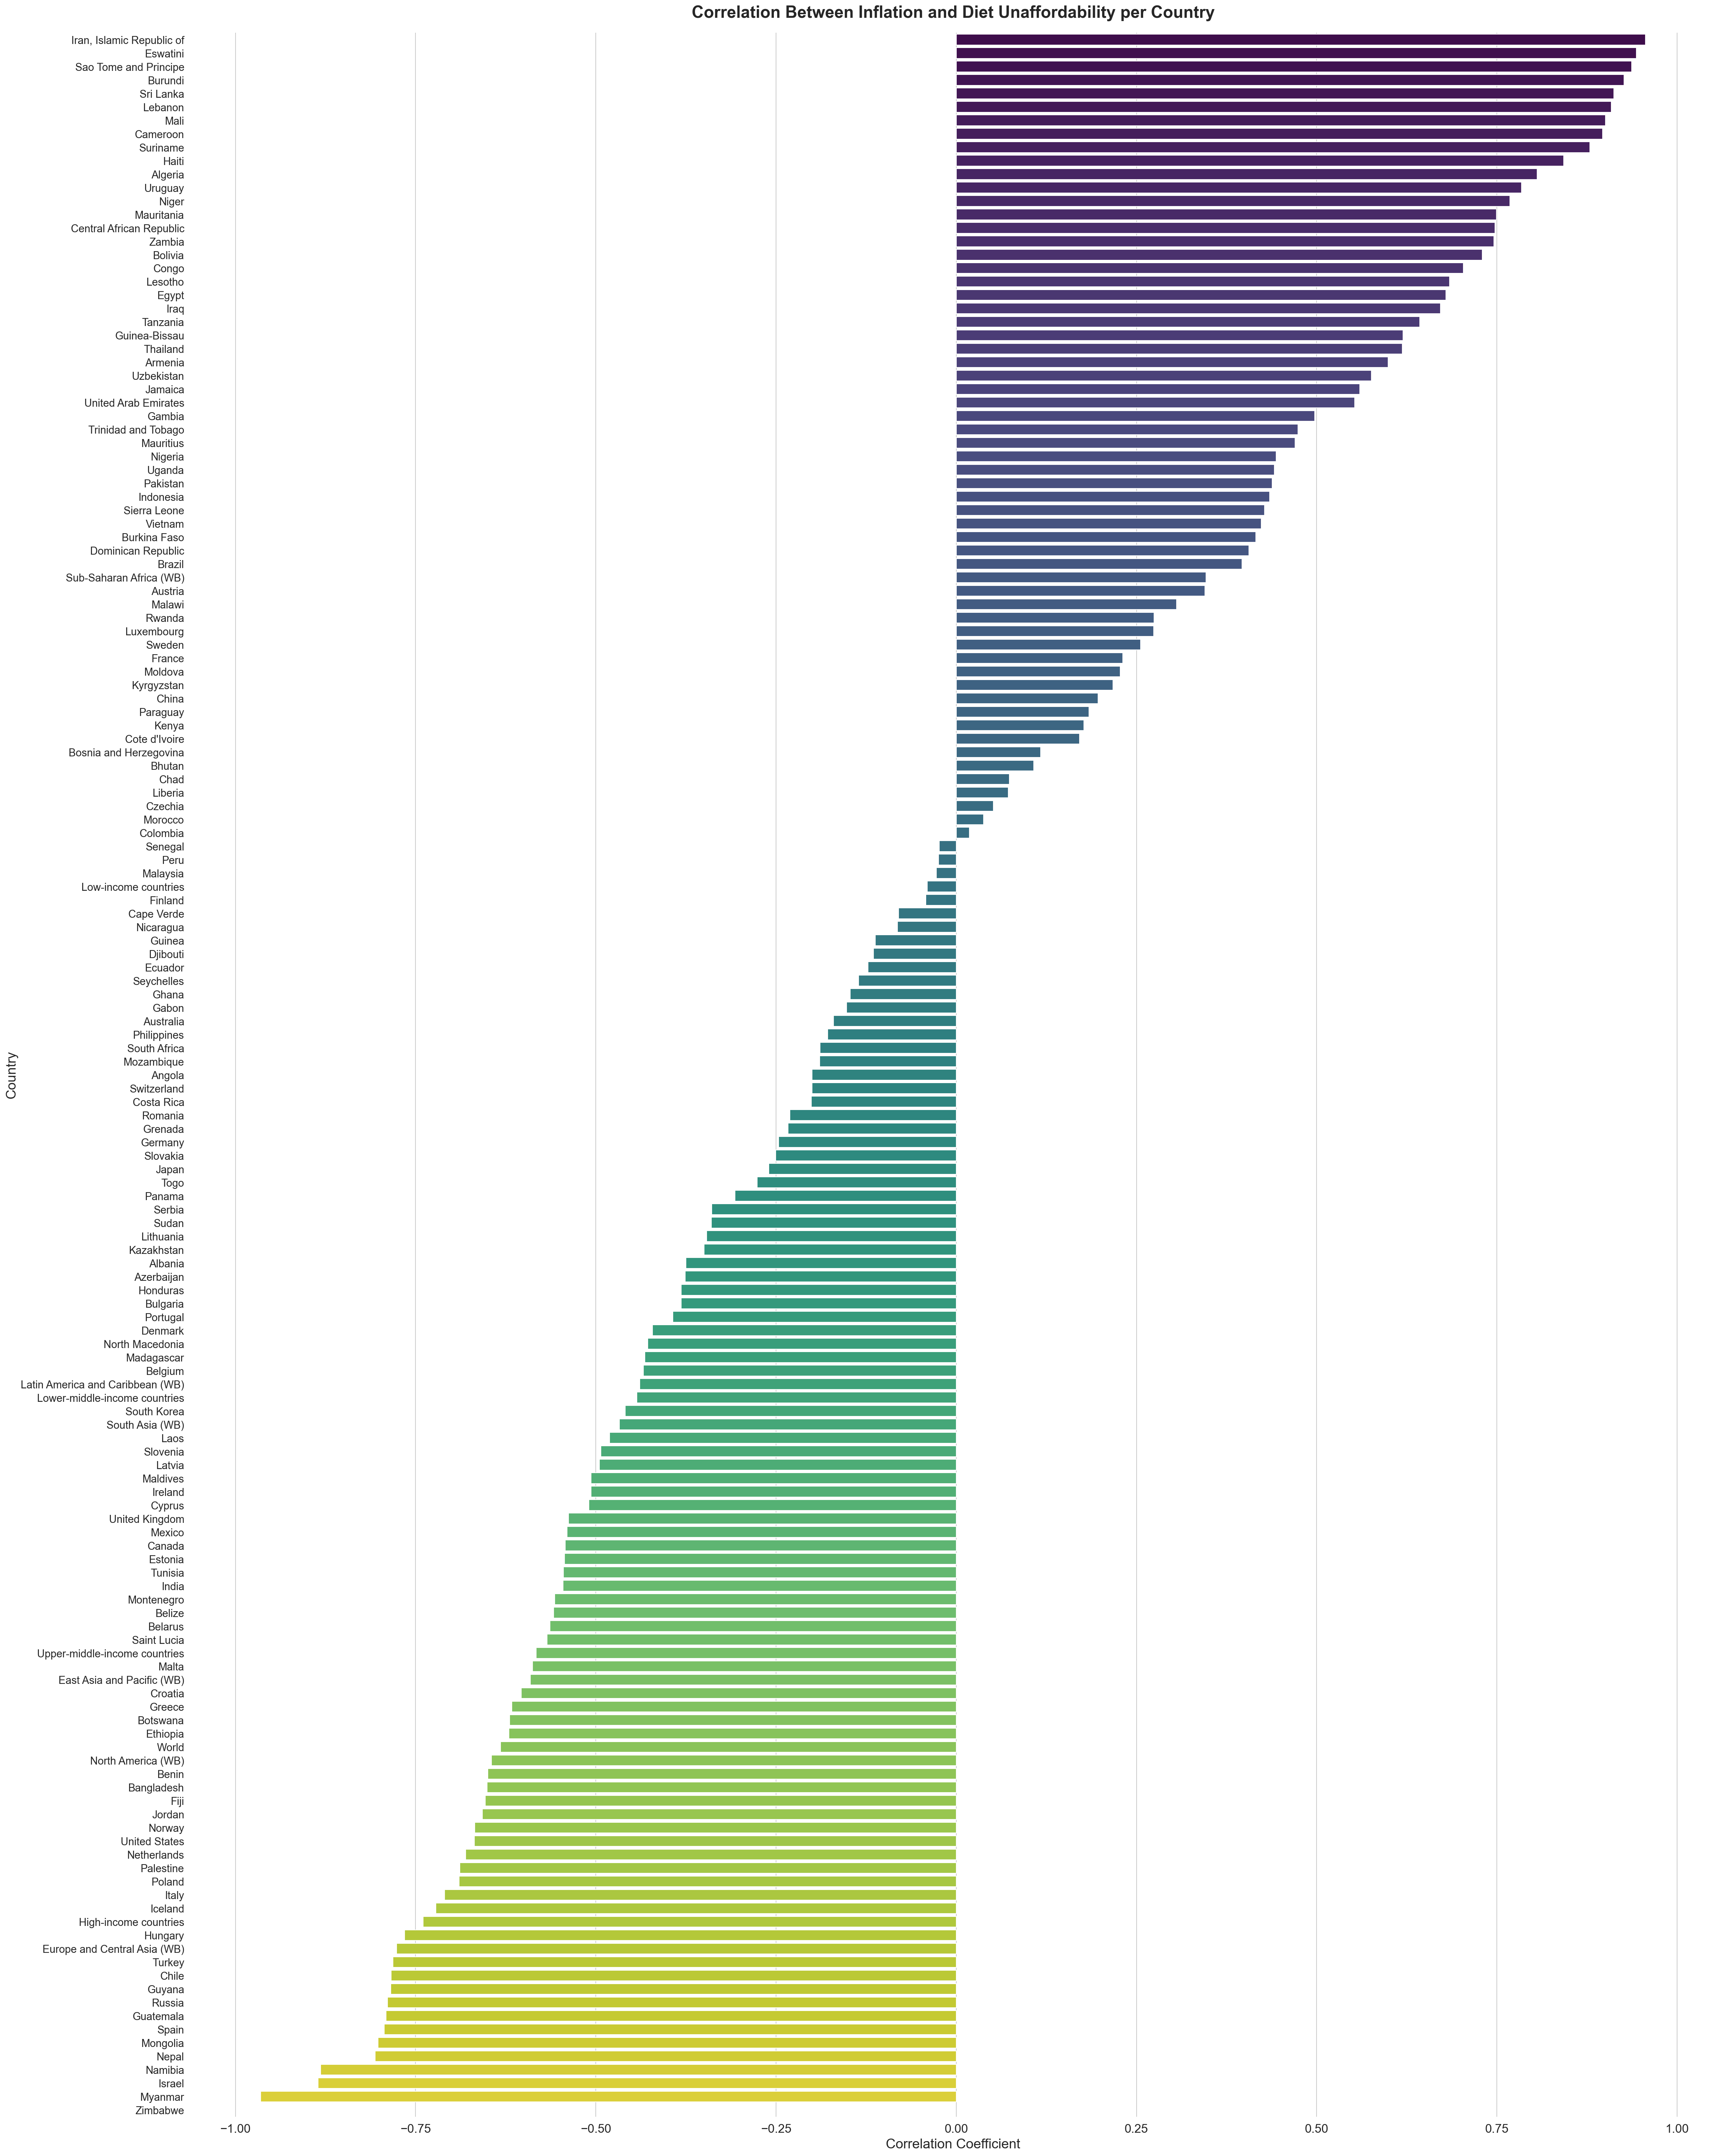

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', font_scale=1.8)

# Increase the height drastically for more space between country names
plt.figure(figsize=(32, 40), dpi=150)

ax = sns.barplot(
    data=corr_per_country,
    y='Entity',
    x='Correlation',
    palette='viridis'
)

plt.title('Correlation Between Inflation and Diet Unaffordability per Country', fontsize=22, weight='bold', pad=20)
plt.xlabel('Correlation Coefficient', fontsize=18)
plt.ylabel('Country', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)

# Keep y-axis labels horizontal
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()
